In [45]:
#Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [46]:
#Step 2: Load the dataset
df = pd.read_csv("Mall_Customers.csv")
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000    

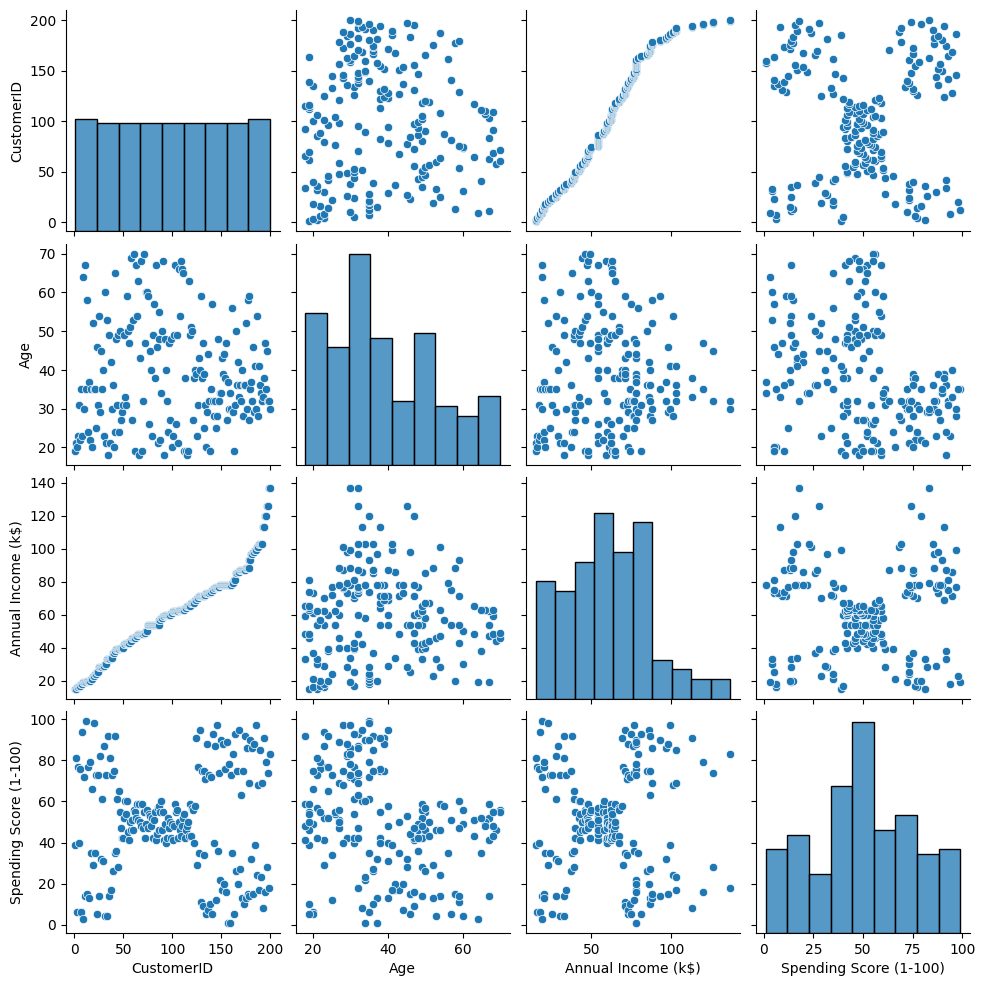

In [47]:
#Step 3: Explore the data
print(df.info())
print(df.describe())
sns.pairplot(df)
plt.show()

# Drop CustomerID as it's not useful for clustering
df = df.drop(columns=['CustomerID'])

# Encode categorical data (Gender)
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

# Standardize the numerical features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [49]:
# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

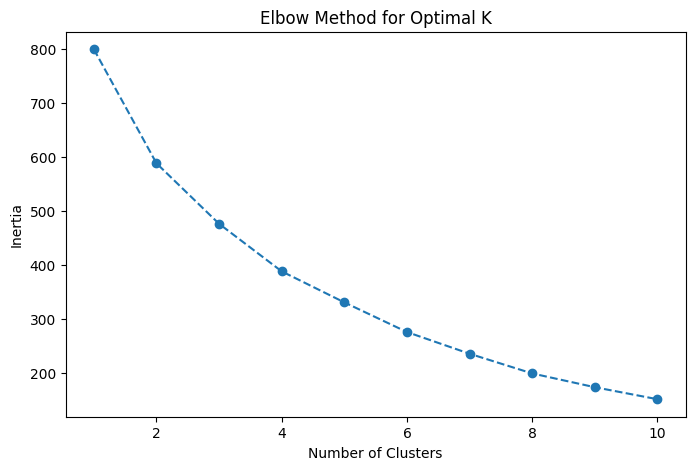

In [50]:
#Step 4: Elbow Method
# Determine optimal number of clusters using Elbow Method
inertia = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)
# Plot Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()



In [52]:
#Step 5: Apply K-Means Clustering with optimal K (Let's assume 5 based on Elbow Method)
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(df_pca)

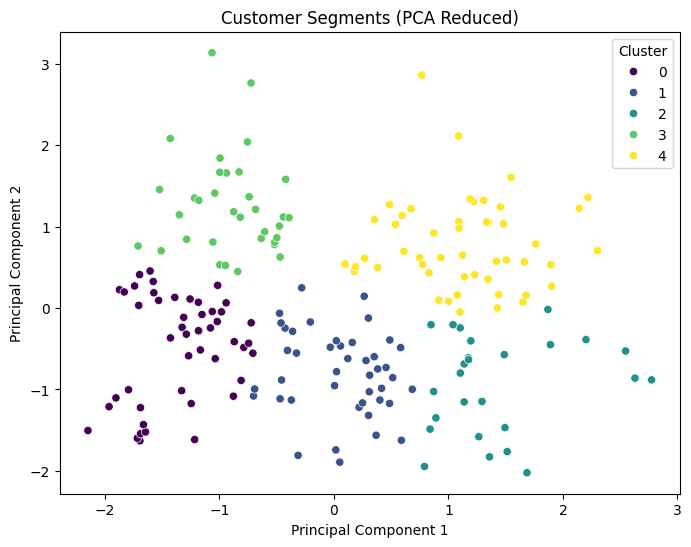

In [53]:
#Tep 6: Visualize clusters in 2D PCA space
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=df['Cluster'], palette='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Customer Segments (PCA Reduced)')
plt.show()


NOTES


#Q1) Why did we drop the customer ID column?

The CustomerID column is just an identifier and doesn’t contribute to clustering, so we remove it.

#Q2) Why did we encoded the categorical data(gender)?

Machine learning models work with numbers, not text.

We convert "Male" to 0 and "Female" to 1.

#Q3) Why did we standardized the data?

Features like "Annual Income" and "Spending Score" have different scales.

StandardScaler() normalizes them so they all have mean = 0 and standard deviation = 1.

This ensures fair comparisons between features.

#Q4) Why did we apply PCA and what is that exactly?

PCA (Principal Component Analysis) reduces data dimensions while keeping key information.

n_components=2 reduces the dataset to two dimensions.

This helps visualize high-dimensional data in a simple 2D plot.

#Q5) What is "inertia"?

inertia_ is the sum of squared distances between points and their cluster centers.

The lower the inertia, the better the clustering—but too low means overfitting.

We run K-Means for different values of k (number of clusters) and store the inertia_ values.

#Q6) What is "Elbow Method"?

This Elbow Method plot helps us decide the best k value.

The "elbow point" (where inertia stops decreasing sharply) is the best choice.

#Q7) Why did we choose 5? fit_predict()?? What is that for?

We choose n_clusters=5 based on the elbow method.

fit_predict() assigns a cluster (0 to 4) to each data point.

#Q8) Okay then, tell me more about visualization?

We plot the data in 2D using PCA-transformed features.

Different colors represent different clusters.

This helps us see the patterns in customer segmentation.

#Q9) How did we decide to use K-Means?
- #1.Problem

We are working with customer segmentation, which means we want to:
- Identify groups of customers with similar shopping behaviors.
- Group them based on features like annual income and spending score.
- Use an unsupervised learning algorithm (because we don’t have predefined labels).

Since our goal is to find natural groups in the data, clustering is the right approach.

- #2. Why K-Means?

K-Means is one of the most popular clustering algorithms. We chose it because
"Efficiency":  
- K-Means is fast and works well with medium-sized datasets like this one.
- Other clustering methods (like DBSCAN or Agglomerative Clustering) can be slower.

Well-Suited for Spherical Clusters:  
- K-Means assumes clusters are circular (or spherical) in shape, which fits well with our data.
- If the data had very complex shapes (like elongated clusters), other methods like DBSCAN or Gaussian Mixture Models (GMM) might be better.

Scalability:  
- It works well even if we scale up the dataset.
- Other methods (like Hierarchical Clustering) become slow for large datasets.

Easy to Interpret:  
- Each cluster is represented by a centroid (mean point).
- It’s easy to visualize and understand.

- #3. How Did We Validate Our Choice?

We used the Elbow Method to find the optimal k (number of clusters).  
If the elbow method showed no clear "elbow," we might have considered DBSCAN or another approach.

#Q10) Why did we choose 5 as K?

We chose K = 5 based on the "Elbow Method", which helps us find the optimal number of clusters.
 - #1. What is the Elbow Method?

- The Elbow Method is a technique for determining the ideal number of clusters (K) in K-Means.
- It works by plotting inertia (or within-cluster sum of squares, WCSS) for different values of K.
- Inertia measures how closely the data points in a cluster are grouped around the centroid. Lower inertia means better clustering.

- #2. How Did We Apply the Elbow Method?

We ran K-Means for different values of K (1 to 10) and recorded their inertia values: (Look at Step 4)
- That graph shows how inertia decreases as K increases.
- At first, adding more clusters reduces inertia significantly.
- After a certain point, the improvement slows down, forming an "elbow shape".

- #3. Why Did We Choose K = 5?
- The "elbow point" is where inertia stops decreasing sharply.
- In our case, K = 5 was where the inertia curve bent, meaning:
  - Adding more clusters didn’t improve the results much.
  - A higher K would lead to overfitting (clusters too specific).
  - A lower K would lead to underfitting (not capturing patterns well).

So, K = 5 was the best balance between accuracy and simplicity.




-*Conclusion*-

This code clusters customers based on their spending habits and annual income.

PCA makes visualization easier by reducing dimensions.

K-Means groups similar customers together, helping businesses create targeted marketing strategies.

K-Means is great when you have roughly spherical clusters, numerical data, and need fast results. It’s easy to interpret and scale.

